<a href="https://colab.research.google.com/github/Terrencebosco/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

# Question 1

In [0]:
# def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):

# You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate,
# a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.

# What is the probability that a person is drunk after one positive breathalyzer test?
# What is the probability that a person is drunk after two positive breathalyzer tests?
# How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
true_positive = 1
prior_probability = .001
false_positive = .08
probability_not = .999

numerator = true_positive * prior_probability
denominatior = numerator + (false_positive * probability_not)

bayes = numerator / denominatior
bayes

0.012357884330202669

In [0]:
# 2 iderations with new prior probablility
true_positive = 1
prior_probability = 0.012357884330202669
false_positive = .08
probability_not = (1 - prior_probability)

numerator = true_positive * prior_probability
denominatior = numerator + (false_positive * probability_not)

bayes = numerator / denominatior
bayes

0.13525210993291495

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positve_rate, true_positive_rate):
  posterior = ((true_positive_rate * prob_drunk_prior) / 
           ((true_positive_rate * prob_drunk_prior) + 
            (false_positve_rate * (1 - prob_drunk_prior ))))
  print(posterior)

In [0]:
prob_drunk_given_positive(.001, .08, 1)

0.012357884330202669


In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positve_rate, true_positive_rate, num_of_tests=1):
    '''
    Calcualte the the probablility of an individual being drunk using bayes theory.
    
    prob_drunk_prior: prior belief about drunk driving in the population.

    false_positve_rat: the rate at whitch the tests provides a positive reading when 
    test subject is not drunk. (false reading)

    true_positive_rate: the rate at whitch a person is drunk returns a positive reading.

    num_of_tests=1 : nunber of times the test is ran. (default is 1)
    '''
    # after one test set the old prior to the new posterior probablility 
    posterior_probability = prob_drunk_prior 
    
    # number of iderations (range 0 to 'num_of_test')
    for num in range(0, num_of_tests): 
        
        # converts the new posterior to 'prior' variable to recalcualte with new 'prior'
        prob_drunk_prior = posterior_probability 

        # bayes formula.
        posterior_probability = ((true_positive_rate * prob_drunk_prior) / 
                ((true_positive_rate * prob_drunk_prior) + 
                    (false_positve_rate * (1 - prob_drunk_prior ))))
        
    # after number of iderations return the probability.    
    return posterior_probability 

In [0]:
prob_drunk_given_positive(.001, .08, 1, num_of_tests=4)

# it would take 4 tests given the information provided to have a probability of more than
# 95% that the test subject is drunk.

0.9606895076105054

# Question 2

2) Explore scipy.stats.bayes_mvs
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

Matplotlib Error Bars

Seaborn barplot with error bars

Vertical ines to show bounds of confidence interval

Confidence Intervals on Box Plots


In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [0]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


![interval](https://www.statisticshowto.com/wp-content/uploads/2009/10/t-dist.jpg)

In [0]:
df['age'].mean()

38.58164675532078

In [0]:
con_inter = stats.t.interval(.95,
                             df.shape[0],
                             loc= df['age'].mean(),
                             scale = stats.sem(df['age']))
con_inter # condfidence intervals


(38.433482476875845, 38.72981103376572)

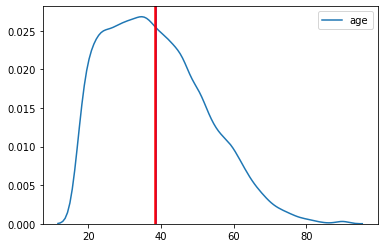

In [0]:
sns.kdeplot(df['age'])
plt.axvline(df['age'].mean(), color='b')
plt.axvline(con_inter[0], color='r')
plt.axvline(con_inter[1], color='r')

In [0]:
bayes_inter = stats.bayes_mvs(df['age'], alpha=.95)
bayes_inter

(Mean(statistic=38.58164675532078, minmax=(38.433490259580736, 38.72980325106083)),
 Variance(statistic=186.05568600783081, minmax=(183.19771927884943, 188.9136527368122)),
 Std_dev(statistic=13.640223092304275, minmax=(13.535460629489652, 13.744985555118898)))

In [0]:
# reading in data

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

# read in column names.
column_names = [
'party',
'handicapped-infants',
'water-project-cost-sharing',
'adoption-of-the-budget-resolution',
'physician-fee-freeze',
'el-salvador-aid',
'religious-groups-in-schools',
'anti-satellite-test-ban',
'aid-to-nicaraguan-contras',
'mx-missile',
'immigration',
'synfuels-corporation-cutback',
'education-spending',
'superfund-right-to-sue',
'crime',
'duty-free-exports',
'export-administration-act-south-africa',
]
 
# read data in with correct format
voting_record = pd.read_csv(url, header=None, names=column_names, na_values='?')

# check data
voting_record.head(2)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN


In [0]:
# convert values to numeric.
voting_record = voting_record.replace({'y':1,'n':0})

# check conversion
voting_record.sample(2)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
346,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
103,democrat,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0


In [0]:
bayes2 = stats.bayes_mvs(no_nan_hand)

(Mean(statistic=0.44208037825059104, minmax=(0.40222729712128685, 0.48193345937989523)),
 Variance(statistic=0.24840706968366538, minmax=(0.22155865134636635, 0.2779357691804369)),
 Std_dev(statistic=0.49810794333785724, minmax=(0.470700171389778, 0.5271961391934096)))

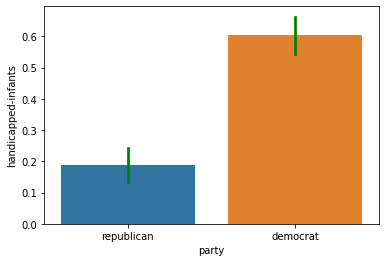

In [0]:
sns.barplot(x='party', y='handicapped-infants', data=voting_record, errcolor='green')

# Question 3

 In your own words, summarize the difference between Bayesian and Frequentist statistics


 Bayesion statistics takes into consideration that the prior of a variable. for example the drunk driver in question 1. The second ideration of the test we use the first tested prior of the over all population. 
 frequentist statistics dont use the previous probability. the probability is likelyhood of whether or not the perosn is drunk and how close can we estimate that. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!